# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [219]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/hangjoni/Geek/CarND/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
testing_file = '/Users/hangjoni/Geek/CarND/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_original, y_train_original = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

signnames_file = '/Users/hangjoni/Geek/CarND/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/signnames.csv'
    

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [220]:
import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train_original.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_test.shape[1], X_test.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
label_uniques = set(y_test)
n_classes = len(label_uniques)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#Find range of values
print("Range of values =", np.amin(X_train_original), np.amax(X_train_original))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43
Range of values = 0 255


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.


Random samples:


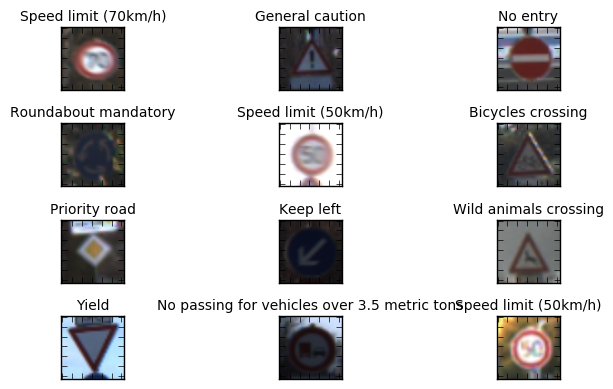


Samples distribution:
Label                                             |Count                          
Speed limit (20km/h)                              |420                             
Speed limit (30km/h)                              |4440                            
Speed limit (50km/h)                              |4500                            
Speed limit (60km/h)                              |2820                            
Speed limit (70km/h)                              |3960                            
Speed limit (80km/h)                              |3720                            
End of speed limit (80km/h)                       |840                             
Speed limit (100km/h)                             |2880                            
Speed limit (120km/h)                             |2820                            
No passing                                        |2940                            
No passing for vehicles over 3.5 metric tons      |402

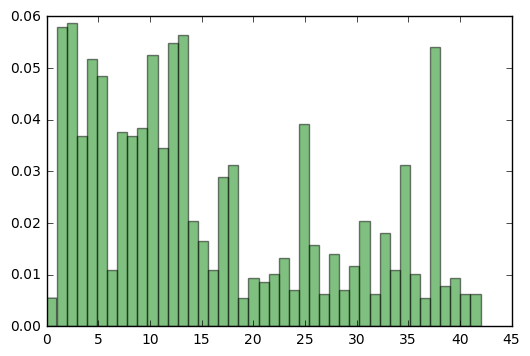

In [221]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import csv

%matplotlib inline

def read_label_names(filename):
    with open(filename, newline='', encoding="utf8") as csvfile:
        spamreader = csv.reader(csvfile)
        vals = [x[1] for x in spamreader][1:]
        return vals

label_names = read_label_names('signnames.csv')

def show_samples(n_samples, images, labels, randomize = False):
    # Show a random sign with its label
    for sample_n in range(n_samples):
#         n = 1
#         while y_train_input[n] != 21:
        if randomize:
            n = random.randint(0, len(images))
        else:
            n = sample_n
        ax = plt.subplot(np.ceil(n_samples/3),3,sample_n+1)
        ax.set_title(label_names[labels[n]], fontsize=10)
        ax.imshow(images[n])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.tight_layout()
    plt.show()
    

def print_train_labels_count():
    print()
    print("Samples distribution:")
    print("%-50s%-32s" % ("Label", "|Count"))
    histogram = np.histogram(y_train, bins=np.arange(43))
    for i in range(len(histogram[0])):
        print("%-50s|%-32d" % (label_names[histogram[1][i]], histogram[0][i]))
        
print()
print("Random samples:")
show_samples(12, X_train_original, y_train_original, randomize = True)

print_train_labels_count()


# the histogram of the labels 
print('Histogram distribution of labels')
n, bins, patches = plt.hist(y_train_original, n_classes, normed=1, facecolor='green', alpha=0.5)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [222]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.utils import shuffle
import cv2

#normalize values to [0,1]
maxx = np.abs(X_train_original).max(axis=0)
X_train_original = X_train_original / maxx

maxx = np.abs(X_test).max(axis=0)
X_test = X_test / maxx

#Shuffle data
X_train_original, y_train_original = shuffle(X_train_original, y_train_original)

print("Range of values =", np.amin(X_train_original), np.amax(X_train_original))


# Convert to grayscale
X_train_rgb = X_train_original
X_train_gry = np.sum(X_train_original/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)




Range of values = 0.0 1.0
RGB shape: (39209, 32, 32, 3)
Grayscale shape: (39209, 32, 32, 1)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- Normalization: Simply divide the pixel values by 255 hence normalizing values to the range (0, 1)
- Shuffle: As similar signs seem to appear together, I needed to shuffle the data to make sequences random 
- Convert image to grayscale: rudimentary approach by averaging the values in each color channel. However I didnot end up using the grayscale image in the final model. Upon training, it seems that the color images do better on accuracies.


39209


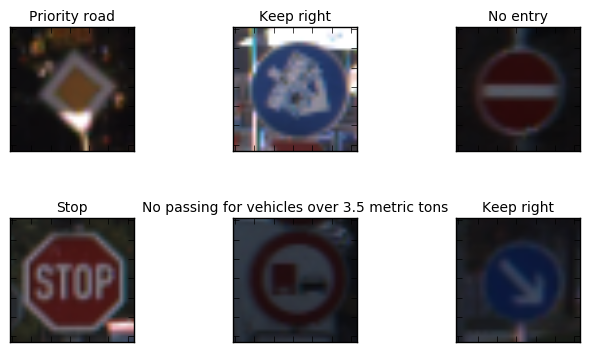

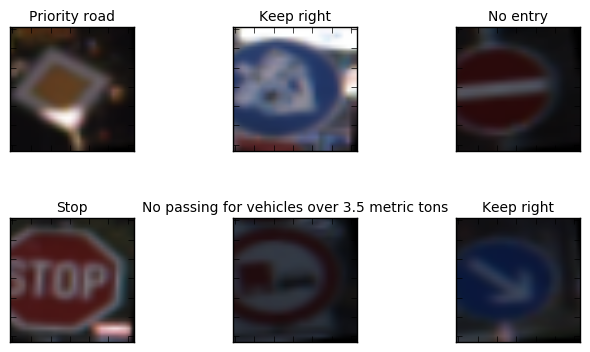

Adding 39209 augmented samples to the training set...
Training size: 78418  labels size: 78418
Test size: 10104  labels size: 10104
Validation size: 2526  labels size: 2526


In [223]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


#Split data into validation and train set
#X_validation = X_train_original[30000:]
#y_validation = y_train_original[30000:]

#X_train = X_train_original[:30000]
#y_train = y_train_original[:30000]

import tensorflow as tf
from sklearn.model_selection import train_test_split


def augment(img):
    random.seed()
    
    rows,cols = img.shape[:2]
    
    M = cv2.getRotationMatrix2D((cols/2,rows/2),random.uniform(-10.0, 10.0),1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = cv2.resize(dst,None,fx=random.uniform(1.3, 1.4), fy=random.uniform(1.01,1.03), interpolation = cv2.INTER_LINEAR)

    dx  = np.shape(dst)[0] - 32
    dy  = np.shape(dst)[1] - 32
    return dst[dx:dx+32, dy:dy+32]
        
augmented = np.array([augment(img) for img in X_train_original])
print(len(X_train_original))

show_samples(6, X_train_original, y_train_original, randomize = False)
show_samples(6, augmented, y_train_original, randomize = False)

print("Adding %s augmented samples to the training set..." % len(augmented))
X_train = np.concatenate((X_train_original, augmented))
y_train = np.concatenate((y_train_original, [x for x in y_train_original]))

n_train = len(X_train)

# Delete to free up some memory
del augmented

# Separate a part of the test set for validation--- test_size will actually be the validation size
# Don't run twice without running the previous cell first!!!
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.2)
print("Training size:", len(X_train), " labels size:", len(y_train) )
print("Test size:", len(X_test), " labels size:", len(y_test) )
print("Validation size:", len(X_validation), " labels size:", len(y_validation) )

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
- Divide the data set into validation and training set (30000 and 9000+ samples each)

In [224]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128
keep_prob = 0.8

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
# SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    with tf.name_scope('Conv_Layer_1') as scope:
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        with tf.name_scope("WX_b_1") as scope:
            conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        with tf.name_scope('relu_1') as scope:
            conv1 = tf.nn.relu(conv1)

        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        with tf.name_scope('pooling_1') as scope:
            conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    with tf.name_scope('Conv_Layer_2') as scope:
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        with tf.name_scope('WX_b_2') as scope:
            conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # SOLUTION: Activation.
        with tf.name_scope('relu_2') as scope:
            conv2 = tf.nn.relu(conv2)

        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        with tf.name_scope('pooling_2') as scope:
            conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        with tf.name_scope('flatten') as scope:
            fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    with tf.name_scope('FC_Layer_1') as scope:
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        with tf.name_scope('Wx_b_3') as scope:
            fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # SOLUTION: Activation & drop out
        with tf.name_scope('relu_3') as scope:
            fc1    = tf.nn.dropout(tf.nn.relu(fc1), keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    with tf.name_scope('FC_Layer_2') as scoope:
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
        with tf.name_scope('Wx_b_4') as scope:
            fc2    = tf.matmul(fc1, fc2_W) + fc2_b

        # SOLUTION: Activation & drop out
        with tf.name_scope('relu_4') as scope:
            fc2    = tf.nn.dropout(tf.nn.relu(fc2), keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    with tf.name_scope('FC_Layer_3') as scope:
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        with tf.name_scope('Wx_b_5') as scope:
            logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The architecture use LeNet model with 2 convolutional layers (14x14x6, 5x5x16) and 3 fully connected layers (120; 84; 43; in sizes respectively). I didn't apply drop out so all nodes are connected to each other. The final classification results is built on top of high-level features extracted from the network. 

As suggested by Pierre & Lecunn paper in Traffic Sign Recognition with Multi-Scale Convolutional Network, the model might benefit from feading low-level features of hidden layer 1 into the classifier.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

#Tensorboard summary of cost function
with tf.name_scope('loss_function') as scope:
    loss_operation = tf.reduce_mean(cross_entropy)
    tf.scalar_summary("loss_operation", loss_operation
                 )
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

merged_summary_op = tf.merge_all_summaries()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    summary_writer = tf.train.SummaryWriter('logfile', graph_def = sess.graph_def)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            summary_str = sess.run(merged_summary_op, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Please switch to tf.summary.merge_all.
Instructions for updating:
Please switch to tf.summary.merge.
Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
Training...

EPOCH 1 ...
Validation Accuracy = 0.273

EPOCH 2 ...
Validation Accuracy = 0.394

EPOCH 3 ...
Validation Accuracy = 0.457

EPOCH 4 ...
Validation Accuracy = 0.492

EPOCH 5 ...
Validation Accuracy = 0.566

EPOCH 6 ...
Validation Accuracy = 0.612

EPOCH 7 ...
Validation Accuracy = 0.620

EPOCH 8 ...
Validation Accuracy = 0.666



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Initially, I used the default optimizer , batch size, epochs and hyper-paramenters from LeNet-Lab. 

Afterwards I observe that the validation accuracy starts out low but keep on improving even at EPOCH 10. That's why I decided to increase the epochs value to 20. I would have increased epochs to a larger value to be even more sure that the accuracy rate has flatted out should my computer doesn't take so long to train.

As I didn't change learning rate, I felt there is no need to change batch size. Since the update in backward step is a function of learning rate and average gradients over a batch of parameters, increasing batch size will make the update step smaller and the model might take longer to converge. 

The choice for Adam Optimizer also helped to enhance the model. Benefits of Adam Optimizer includes:
- It accumulates the square of gradients in previous steps hence effectively reducing learning rate overtime. Hence there is less of a need to tune learning rate in the beginning
- It takes into account momentum of previous update steps hence pushing the convergence faster and helps to reduce the risk of local minima / oscillation
- It varies the effective learning rate to make the less frequent features be updated more drastically


To further improve the model, I would try the following should I have time:
- Generate additional data, especially for the traffic signs with less data. The new data should have various tilting angle, exposure, brightness
- Use drop out to make the model more robust and avoid overfit
- Experiment with lower learning rate and higher EPOCH
- Use color threshold / grayscale to increase the robustness of the network. Right now it seems that the model doesn't recognize borders and lines very well (mixing up numbers '3' and '8' ...)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I use LeNet-Lab 's conv net and it works great getting validation accuracy of 97.8%. It would be interesting to try implementing the Multi-Scale Convolutional Network as described in the paper by Pierre & Lecun. This model is simpler (only 2 layers) so it should be faster to train. The architecture is interesting with multi-scale instead of single scale which allows for the base simple features to be fed into the classifier together with more complex features. However, I appreciate that LeNet model works well just out of the box without much tweaking needed.

In [204]:
#thanks to suggestions from previous reviewer. Below is visualization of the LeNet model used
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
show_graph(tf.get_default_graph().as_graph_def())

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

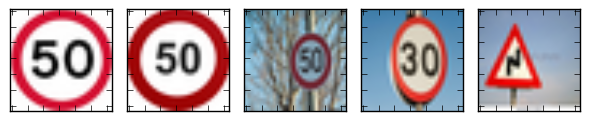

(5, 32, 32, 1)


In [175]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from pylab import *

%matplotlib inline

filelist = ['new-data/50-easy-1.jpeg', 'new-data/50-easy-2.jpg', 'new-data/50-trees-pole.jpg', 'new-data/30-pole.jpg', 'new-data/double-curve.jpg']
X_new = []

for i in range(len(filelist)):
    filename = filelist[i]
    image = Image.open(filename)
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = array(image)
    X_new.append(image)

X_new = array(X_new)




for i in range(len(filelist)):
    ax = plt.subplot(1,5,i+1)
    ax.imshow(X_new[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.tight_layout()
plt.show()


#convert image to gray scale
X_new_gray = np.sum(X_new/3, axis=3, keepdims=True)
print(X_new_gray.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Image 3, 4, 5 are particularly hard as images are tilted to the left or right, the aspect ratio is distorted ('30 km/h' sign is oval instead of round), and the sign does not lay center inside the image

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Accuracy on new images:  0.40000000596


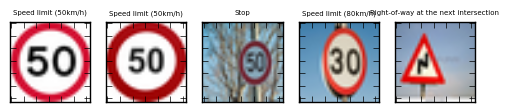

In [184]:
### Run the predictions here.
### Feel free to use as many code cells as needed.



with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    prediction = tf.argmax(logits, 1)
    best = sess.run(prediction, feed_dict={x: X_new})
    best_labels = [label_names[i] for i in best]
    
    #print out accuracy
    correct_labels = [2, 2, 2, 1, 21]
    accuracies = evaluate(X_new, correct_labels)
    print('Accuracy on new images: ', accuracies)

#display images and predicted label
for i in range(len(filelist)):
    ax = plt.subplot(1,5,i+1)
    ax.set_title(best_labels[i], fontsize = 5)
    ax.imshow(X_new[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    

plt.show()



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model has 40% accuracy on new images. Not really good I think.
The model might perform better should I have generated new data that takes into a few effects of tilting angles, light exposures, images scaling up or down  in the pictures, aspect ratio distorted etc. Also as the '30 km/h' sign is mistook for '80 km/h' sign indicates that preprocessing should be improved to enhance perceived sharpness / edges that can be fed to the model.

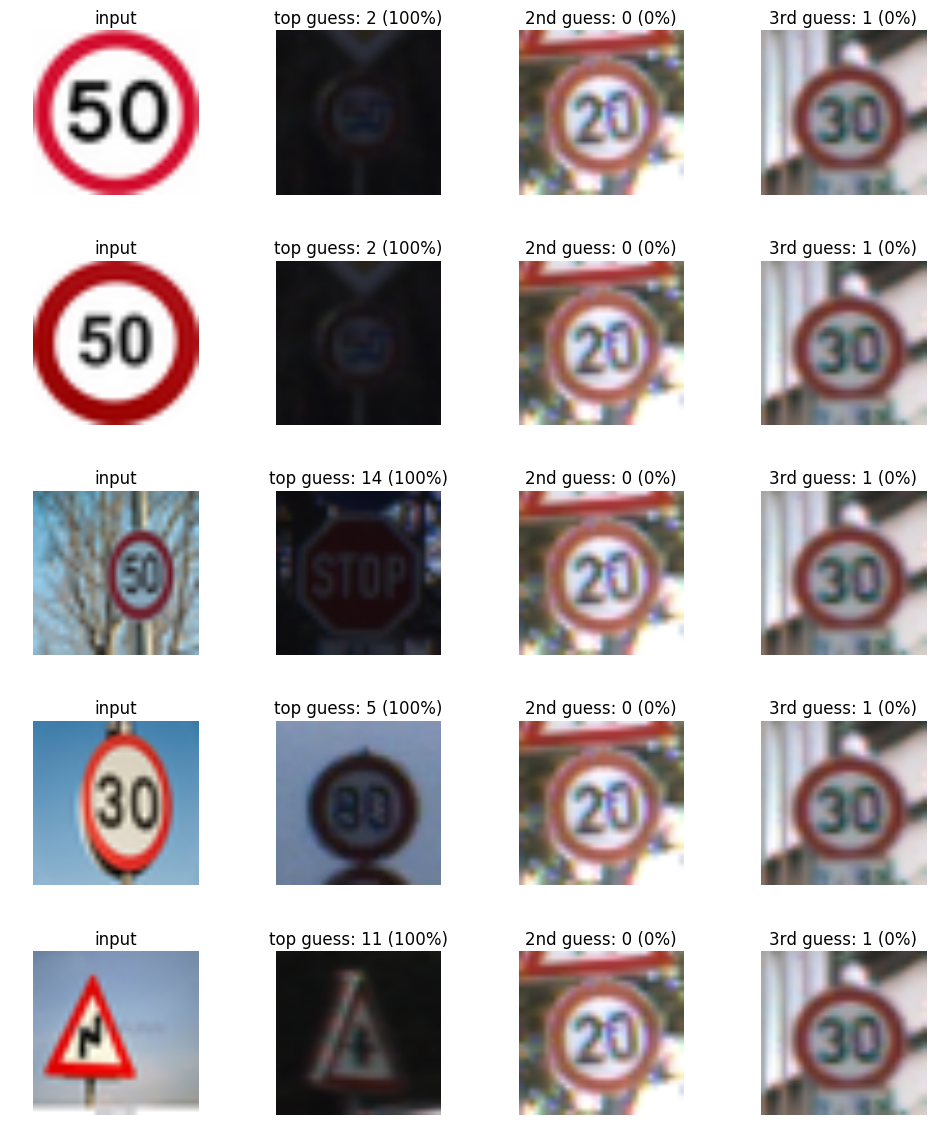

In [196]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_new})
    my_top_k = sess.run(top_k, feed_dict={x: X_new})

    
    fig, axs = plt.subplots(len(X_new),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(X_new):
        axs[4*i].axis('off')
        axs[4*i].imshow(image)
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze())
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze())
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze())
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Surprisingly, the model is very sure of itself with all predictions coming out at ~100% soft-max probability, even for predictions that are outright incorrect. I wonder if there is a better probability/activation function that does not overweight on the number 1 guess and reflect better the level of uncertainty in given circumstance

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

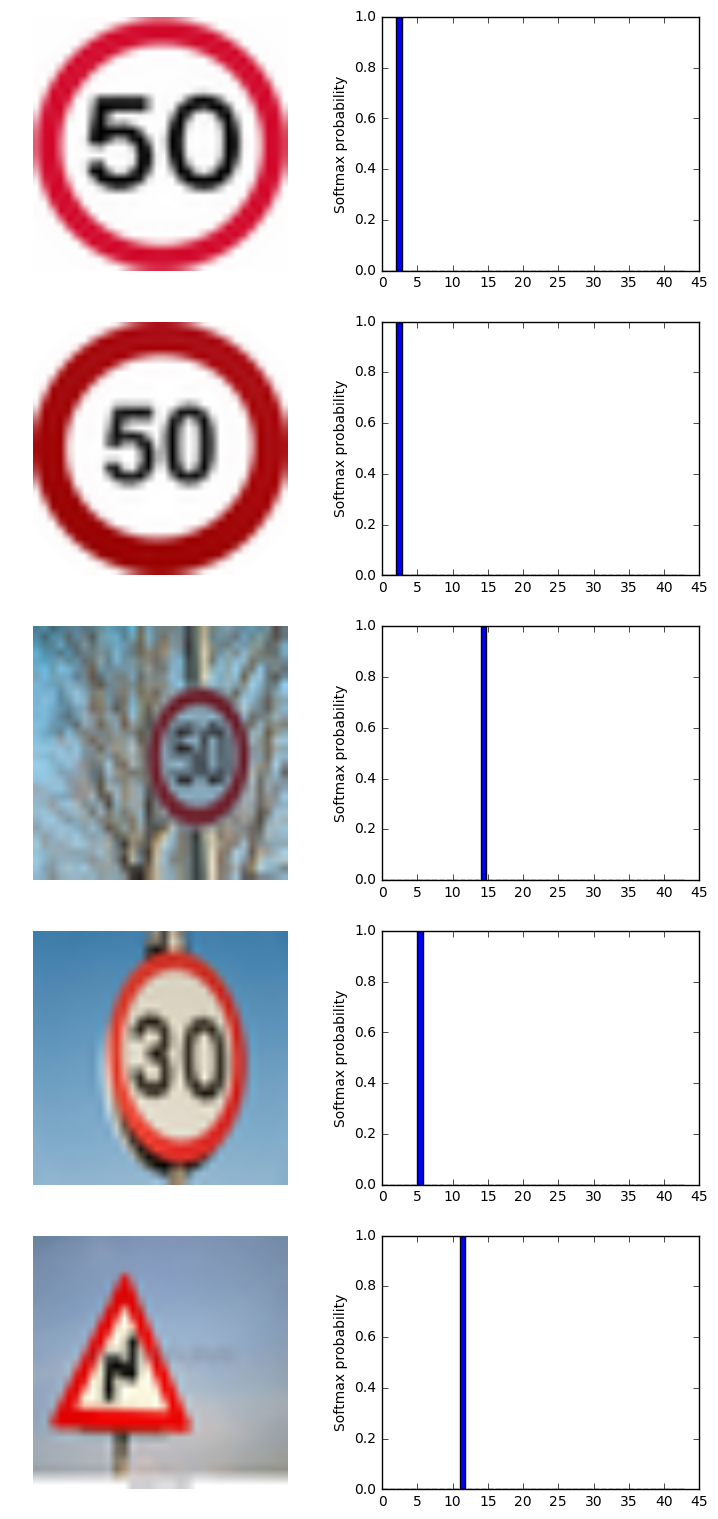

In [195]:
fig, axs = plt.subplots(5,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(X_new[i//2])
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')